In [1]:
import numpy as np 
import matplotlib.pylab as plt
import ipywidgets as widgets
from IPython.display import display


from src.T2Prep import run_simulation_single_tissue

In [2]:
def plot_simulation(T1_ms, T2_ms, flip_angle_deg, step_size_ms, n_species, n_steps, step_refocus):


    magnetization, time, magnetization_k = run_simulation_single_tissue(T1_ms, T2_ms, flip_angle_deg, step_size_ms, n_species, int(n_steps), int(step_refocus))

    fig, ax = plt.subplots(1,1,figsize=(10,10))
    fontsize = 20
    ax.plot(time, np.linalg.norm(magnetization_k[:, :2], axis=-1), label="Species k $M_\perp$", color='black', linewidth=4)
    ax.plot(time, np.linalg.norm(magnetization[:, :2], axis=-1), label="Species Ensemble $M_\perp$", color='#F25050', linewidth=1)
    ax.plot(time, magnetization[:, 2], label="Species Ensemble $M_z$", color='#F25050', linewidth=1, linestyle='--')
    ax.set_xlabel("Time (ms)", fontsize=fontsize)
    ax.set_ylabel("$M/M_0$", fontsize=fontsize)
    ax.legend(loc='best', fontsize='large')
    ax.set_ylim(-1,1)

    plt.show()

In [4]:
widgets.interact(
    plot_simulation,
    T1_ms=widgets.FloatSlider(min=100, max=2000, step=10, value=500, description='T1 (ms)'),
    T2_ms=widgets.FloatSlider(min=10, max=200, step=1, value=50, description='T2 (ms)'),
    flip_angle_deg=widgets.FloatSlider(min=0, max=180, step=1, value=90, description='FA 1 (deg)'),
    step_size_ms=widgets.FloatSlider(min=0.01, max=1, step=0.01, value=0.5, description='Step size (ms)'),
    n_species=widgets.FloatSlider(min=1, max=4000, step=1, value=1000, description='n spins'), 
    n_steps=widgets.FloatSlider(min=250, max=1000, step=1, value=500, description='n steps'), 
    step_refocus=widgets.FloatSlider(min=50, max=150, step=1, value=100, description='step refocus')
)

interactive(children=(FloatSlider(value=500.0, description='T1 (ms)', max=2000.0, min=100.0, step=10.0), Float…

<function __main__.plot_simulation(T1_ms, T2_ms, flip_angle_deg, step_size_ms, n_species, n_steps, step_refocus)>

In [ ]:
Myocardial tissue (normal):

T1: ~1100 ms
T2: ~50 ms
Myocardial scar:

T1: ~400 ms
T2: ~50 ms
Myocardial blood:

T1: ~1900 ms
T2: ~275 ms

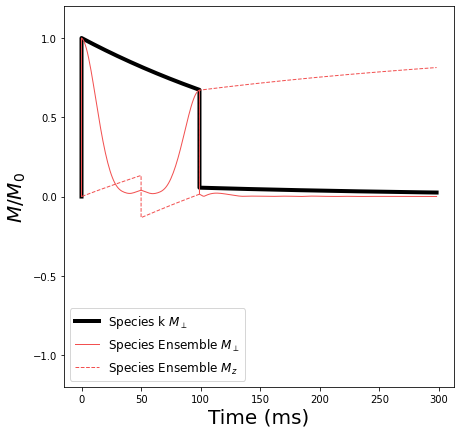

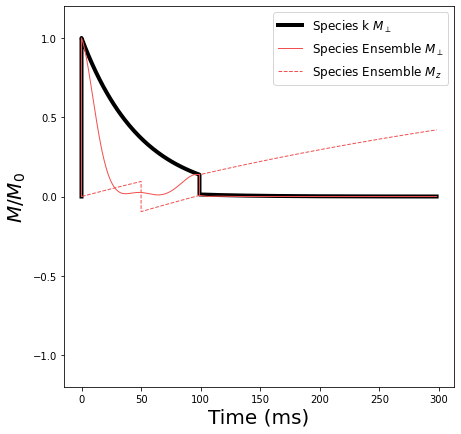

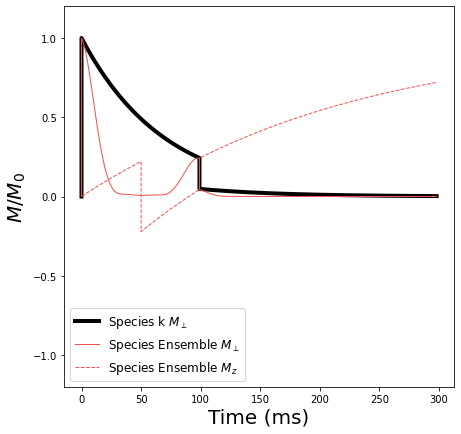

In [6]:
def run_simulation(tissue_types, flip_angle_deg, step_size_ms, n_species, n_steps, step_refocus):
    results = []
    for tissue in tissue_types:
        T1_ms, T2_ms = tissue['T1'], tissue['T2']
        magnetization, time, magnetization_k = run_simulation_single_tissue(T1_ms, T2_ms, flip_angle_deg, step_size_ms, n_species, int(n_steps), int(step_refocus))
        results.append((magnetization, time, magnetization_k))
        
        fig, ax = plt.subplots(1,1,figsize=(7,7))
        fontsize = 20
        ax.plot(time, np.linalg.norm(magnetization_k[:, :2], axis=-1), label="Species k $M_\perp$", color='black', linewidth=4)
        ax.plot(time, np.linalg.norm(magnetization[:, :2], axis=-1), label="Species Ensemble $M_\perp$", color='#F25050', linewidth=1)
        ax.plot(time, magnetization[:, 2], label="Species Ensemble $M_z$", color='#F25050', linewidth=1, linestyle='--')
        ax.set_xlabel("Time (ms)", fontsize=fontsize)
        ax.set_ylabel("$M/M_0$", fontsize=fontsize)
        ax.legend(loc='best', fontsize='large')
        ax.set_ylim(-1.2,1.2)
        plt.show()
    return results

tissue_types = [
    {'T1': 350, 'T2': 250},  # Blood
    {'T1': 500, 'T2': 50},   # Normal myocardium
    {'T1': 200, 'T2': 70}    # Scar
]

flip_angle_deg = 90
step_size_ms = 1
n_species = 1000
n_steps = 300
step_refocus = 50

results = run_simulation(tissue_types, flip_angle_deg, step_size_ms, n_species, n_steps, step_refocus)




In [34]:
def run_simulation(tissue_types, flip_angle_deg, step_size_ms, n_species, n_steps, step_refocus):
    results = []
    for tissue in tissue_types:
        T1_ms, T2_ms = tissue['T1'], tissue['T2']
        magnetization, time, magnetization_k = run_simulation_single_tissue(T1_ms, T2_ms, flip_angle_deg, step_size_ms, n_species, int(n_steps), int(step_refocus))
        results.append((magnetization, time, magnetization_k))
        
    return results

tissue_types = [
    {'T1': 350, 'T2': 250},  # Blood
    {'T1': 500, 'T2': 50},   # Normal myocardium
    {'T1': 200, 'T2': 70}    # Scar
]

results = []

for n_steps in range(8, 100, 8):

    flip_angle_deg = 90
    step_size_ms = 0.5
    n_species = 1000
    #n_steps = 102
    step_refocus = n_steps//2 - 1

    result = run_simulation(tissue_types, flip_angle_deg, step_size_ms, n_species, n_steps, step_refocus)

    results.append(result)

     


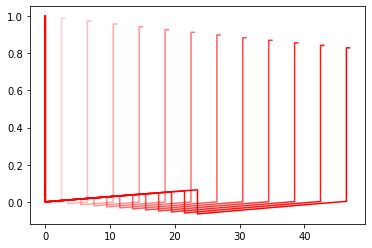

In [43]:
alpha_ranges = np.linspace(0.2, 1, len(results))

for result, alpha_range in zip(results, alpha_ranges):
    plt.plot(result[0][1], result[0][0][:, 2], alpha=alpha_range, color='red')
plt.show()